In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [2]:
ticker = 'TATAMOTORS.NS'
start_date = '2018-01-01'
end_date = '2023-10-31'

In [3]:
df = yf.download(ticker, start_date, end_date).reset_index()
df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,430.950012,436.399994,422.250000,424.450012,423.131256,6807536
1,2018-01-02,428.850006,440.850006,422.000000,439.299988,437.935089,15331261
2,2018-01-03,440.399994,441.399994,431.950012,433.899994,432.551849,9794953
3,2018-01-04,430.000000,433.299988,425.750000,429.950012,428.614166,8395377
4,2018-01-05,431.250000,436.350006,429.799988,431.600006,430.259033,7021611
...,...,...,...,...,...,...,...
1435,2023-10-23,663.650024,667.250000,645.000000,647.349976,647.349976,8564004
1436,2023-10-25,650.000000,651.900024,636.049988,637.849976,637.849976,8229559
1437,2023-10-26,635.000000,635.650024,624.150024,626.549988,626.549988,8889373
1438,2023-10-27,630.000000,643.950012,628.450012,641.049988,641.049988,10232856


In [4]:
data = df['Close']

scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))
data

array([[0.59511188],
       [0.6197183 ],
       [0.61077051],
       ...,
       [0.92999171],
       [0.95401823],
       [0.93322289]])

In [5]:
training_data_len = int(len(data) * 0.8)
training_data = data[0:training_data_len, :]
testing_data = data[training_data_len:, :]

len(training_data), len(testing_data)

(1152, 288)

In [6]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [7]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
6/6 [==============================] - 13s 18ms/step - loss: 0.1350
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0982
Epoch 3/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0660
Epoch 4/200
6/6 [==============================] - 0s 16ms/step - loss: 0.0436
Epoch 5/200
6/6 [==============================] - 0s 19ms/step - loss: 0.0388
Epoch 6/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0405
Epoch 7/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0358
Epoch 8/200
6/6 [==============================] - 0s 17ms/step - loss: 0.0319
Epoch 9/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0281
Epoch 10/200
6/6 [==============================] - 0s 18ms/step - loss: 0.0220
Epoch 11/200
6/6 [==============================] - 0s 14ms/step - loss: 0.0154
Epoch 12/200
6/6 [==============================] - 0s 15ms/step - loss: 0.0080
Epoch 13/200
6/6 [==============================

6/6 [==============================] - 0s 14ms/step - loss: 1.8045e-04
Epoch 100/200
6/6 [==============================] - 0s 13ms/step - loss: 1.7784e-04
Epoch 101/200
6/6 [==============================] - 0s 15ms/step - loss: 1.7822e-04
Epoch 102/200
6/6 [==============================] - 0s 14ms/step - loss: 1.7901e-04
Epoch 103/200
6/6 [==============================] - 0s 15ms/step - loss: 1.8085e-04
Epoch 104/200
6/6 [==============================] - 0s 14ms/step - loss: 1.8139e-04
Epoch 105/200
6/6 [==============================] - 0s 13ms/step - loss: 1.7871e-04
Epoch 106/200
6/6 [==============================] - 0s 15ms/step - loss: 1.8186e-04
Epoch 107/200
6/6 [==============================] - 0s 12ms/step - loss: 1.8205e-04
Epoch 108/200
6/6 [==============================] - 0s 11ms/step - loss: 1.8203e-04
Epoch 109/200
6/6 [==============================] - 0s 11ms/step - loss: 1.7865e-04
Epoch 110/200
6/6 [==============================] - 0s 11ms/step - loss: 1.793

6/6 [==============================] - 0s 17ms/step - loss: 1.7997e-04
Epoch 196/200
6/6 [==============================] - 0s 14ms/step - loss: 1.8132e-04
Epoch 197/200
6/6 [==============================] - 0s 14ms/step - loss: 1.7798e-04
Epoch 198/200
6/6 [==============================] - 0s 14ms/step - loss: 1.7746e-04
Epoch 199/200
6/6 [==============================] - 0s 15ms/step - loss: 1.8110e-04
Epoch 200/200
6/6 [==============================] - 0s 13ms/step - loss: 1.8518e-04


In [8]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

9/9 [==============================] - 0s 4ms/step


In [9]:
pred_train, pred

(array([[0.5980788 ],
        [0.62246376],
        [0.6136026 ],
        ...,
        [0.65505517],
        [0.66461605],
        [0.6454849 ]], dtype=float32),
 array([[0.66763765],
        [0.65922385],
        [0.6547281 ],
        [0.6526839 ],
        [0.6332023 ],
        [0.6272195 ],
        [0.6332842 ],
        [0.641638  ],
        [0.65112996],
        [0.640328  ],
        [0.6354961 ],
        [0.61130404],
        [0.59972245],
        [0.6141771 ],
        [0.6033379 ],
        [0.6108115 ],
        [0.59585935],
        [0.5536983 ],
        [0.5558426 ],
        [0.5563373 ],
        [0.5615315 ],
        [0.5654052 ],
        [0.55394566],
        [0.5708429 ],
        [0.58105314],
        [0.5778428 ],
        [0.55114114],
        [0.5468509 ],
        [0.5521311 ],
        [0.55617243],
        [0.5516361 ],
        [0.5513887 ],
        [0.5648284 ],
        [0.5562548 ],
        [0.5546879 ],
        [0.5546054 ],
        [0.5604599 ],
        [0.5653228 ],
  

In [10]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [11]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 5.41006428629911
Root Mean Squared Error (RMSE): 8.171496873322251


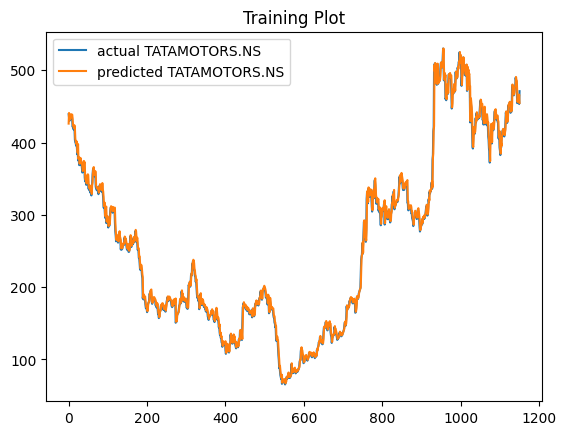

In [12]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 6.159522186172969
Root Mean Squared Error (RMSE): 8.152948631156283


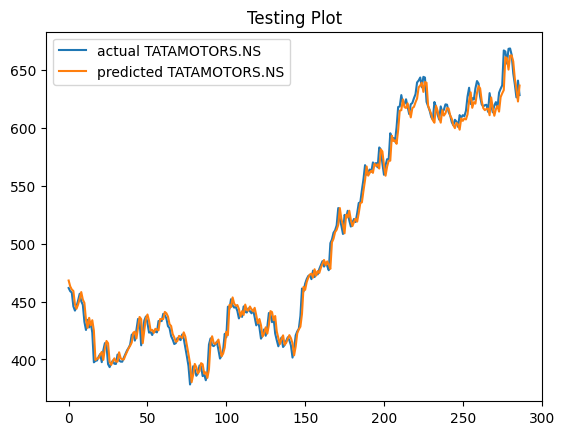

In [13]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

In [14]:
y_test[-1]

628.5

In [15]:
pred[-1]

array([636.7134], dtype=float32)

In [16]:
start_date = '2023-11-01'
end_date = '2023-12-08'
future_data = yf.download(ticker, start_date, end_date).reset_index()['Close']
future_data

[*********************100%***********************]  1 of 1 completed


0     627.700012
1     636.450012
2     647.500000
3     646.049988
4     645.000000
5     642.549988
6     649.349976
7     651.049988
8     653.250000
9     671.549988
10    680.400024
11    681.549988
12    674.299988
13    681.700012
14    681.200012
15    679.950012
16    673.700012
17    697.500000
18    712.349976
19    706.400024
20    705.450012
21    705.599976
22    708.950012
23    722.450012
24    721.950012
Name: Close, dtype: float64

In [17]:
future_data = np.array(future_data)
len(future_data)

25

In [18]:
# model(april1) = (april2-pred) -> april2actual



# model(april2-pred) = april3-pred

In [19]:
def predict_future(days, last_input, future_data):
    Output = []
    i = 0
    temp = scaler.transform(future_data.reshape(-1, 1))
    
    while(i<days):
        if(len(last_input)>past_values):
            last_input = last_input[1:]
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            last_input = last_input[1:]
            Output.extend(res.tolist())
            i=i+1
        else:
            last_input = last_input.reshape((1, past_values, 1))
            res = model.predict(last_input)
            last_input = np.append(last_input, temp[i])
            Output.extend(res.tolist())
            i=i+1
        
    Output = scaler.inverse_transform(Output)
    return Output, last_input
    
future_predictions, last_input = predict_future(len(future_data), X_test[-1], future_data)
future_predictions = future_predictions.flatten()

1/1 [==============================] - 0s 131ms/step


In [20]:
future_data

array([627.70001221, 636.45001221, 647.5       , 646.04998779,
       645.        , 642.54998779, 649.34997559, 651.04998779,
       653.25      , 671.54998779, 680.40002441, 681.54998779,
       674.29998779, 681.70001221, 681.20001221, 679.95001221,
       673.70001221, 697.5       , 712.34997559, 706.40002441,
       705.45001221, 705.59997559, 708.95001221, 722.45001221,
       721.95001221])

In [21]:
future_predictions

array([636.71342508, 624.05548432, 632.35743215, 642.81133315,
       641.44147021, 640.44912714, 638.13256884, 644.55810444,
       646.16260884, 648.23769112, 665.44432359, 673.73044401,
       674.80526951, 668.02163859, 674.94555798, 674.47821752,
       673.30965055, 667.45944155, 689.67412055, 703.44692298,
       697.93689553, 697.05602783, 697.19502133, 700.29971305,
       712.77481117])

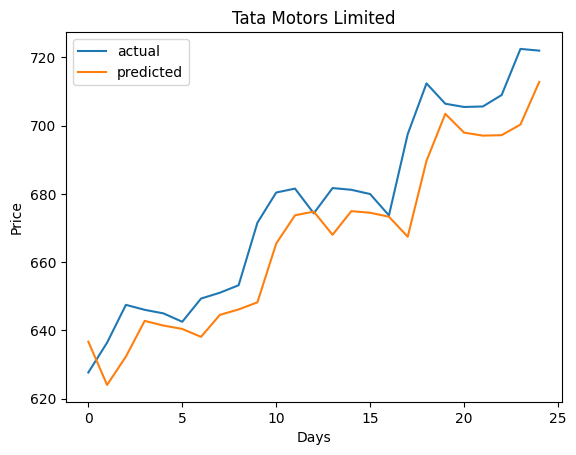

In [22]:
plt.plot(future_data, label = 'actual')
plt.plot(future_predictions, label = 'predicted')
plt.title('Tata Motors Limited')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [83]:
def get_control_vector(val):
    return np.diff(np.sign(np.diff(val)))

def buy_and_sell_bot(val,controls):
    print('val', val)
    print('controls', controls)
    inv = []
    curr_val = 1000
    inds = np.where(controls)[0]
    buy_inds = np.where(controls>0)[0]
    sell_inds = np.where(controls<0)[0]
    max_limit = sell_inds[-1] if sell_inds[-1]>buy_inds[-1] else buy_inds[-1]
    for i in range(buy_inds[0]+2):
        inv.append(curr_val)
    for i in range(buy_inds[0],max_limit+1):
        if controls[i]>0:
            buy_val = val[i+1]
        elif controls[i]<0:
            sell_val = val[i+1]
            curr_val = curr_val*sell_val/buy_val
        inv.append(curr_val)
        
    if max_limit+1!=len(controls):
        for i in range(len(controls)-max_limit-1):
            inv.append(curr_val)
    return inv

In [85]:
controls_actual = get_control_vector(future_data)
amount_actual = buy_and_sell_bot(future_data, controls_actual)
print('amount_actual',amount_actual)

val [627.70001221 636.45001221 647.5        646.04998779 645.
 642.54998779 649.34997559 651.04998779 653.25       671.54998779
 680.40002441 681.54998779 674.29998779 681.70001221 681.20001221
 679.95001221 673.70001221 697.5        712.34997559 706.40002441
 705.45001221 705.59997559 708.95001221 722.45001221 721.95001221]
controls [ 0. -2.  0.  0.  2.  0.  0.  0.  0.  0. -2.  2. -2.  0.  0.  2.  0. -2.
  0.  2.  0.  0. -2.]
amount_actual [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1060.6956668600326, 1060.6956668600326, 1072.3361443518763, 1072.3361443518763, 1072.3361443518763, 1072.3361443518763, 1072.3361443518763, 1133.855740549154, 1133.855740549154, 1133.855740549154, 1133.855740549154, 1133.855740549154, 1161.179501631858]


In [86]:
controls_pred= get_control_vector(future_predictions)
amount_pred = buy_and_sell_bot(future_predictions, controls_pred)
print('amount_pred',amount_pred)

val [636.71342508 624.05548432 632.35743215 642.81133315 641.44147021
 640.44912714 638.13256884 644.55810444 646.16260884 648.23769112
 665.44432359 673.73044401 674.80526951 668.02163859 674.94555798
 674.47821752 673.30965055 667.45944155 689.67412055 703.44692298
 697.93689553 697.05602783 697.19502133 700.29971305 712.77481117]
controls [ 2.  0. -2.  0.  0.  2.  0.  0.  0.  0.  0. -2.  2. -2.  0.  0.  2.  0.
 -2.  0.  2.  0.  0.]
amount_pred [1000, 1000, 1000, 1000, 1030.0547776579945, 1030.0547776579945, 1030.0547776579945, 1030.0547776579945, 1030.0547776579945, 1030.0547776579945, 1030.0547776579945, 1030.0547776579945, 1030.0547776579945, 1089.250769806777, 1089.250769806777, 1100.5406503777317, 1100.5406503777317, 1100.5406503777317, 1100.5406503777317, 1100.5406503777317, 1159.8786172297941, 1159.8786172297941, 1159.8786172297941, 1159.8786172297941, 1159.8786172297941]


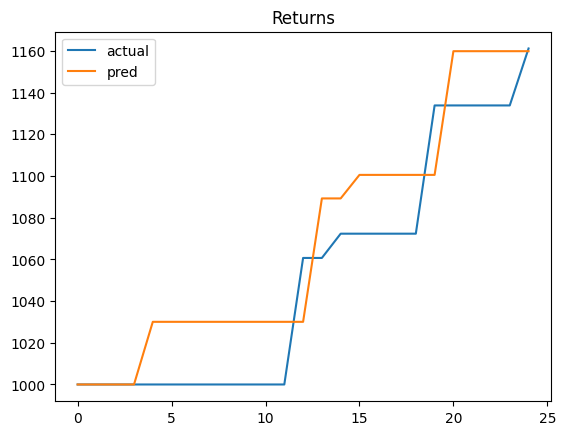

In [87]:
plt.plot(amount_actual, label="actual")
plt.plot(amount_pred, label="pred")
plt.legend()
plt.title("Returns")
plt.show()